# Applied Machine Learning: Value Estimation



## 1.1 Overview of Value Estimation

In this section, we'll introduce the concept of value estimation and its applications.

## 1.2 Data Exploration & Cleaning

We'll use the Ames Iowa Housing Dataset to explore and clean data for our value estimation model.
This dataset contains information on residential properties in Ames, Iowa, including features like:
- Property size and dimensions
- Building quality and condition
- Number of rooms and bathrooms
- Neighborhood information
- Sale price (our target variable)

Let's start by loading and exploring the dataset:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

: 

In [2]:
# Load the dataset
url = "https://github.com/mattharrison/datasets/raw/master/data/ames-housing-dataset.zip"
df = pd.read_csv(url, compression='zip')
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [3]:
df.shape

(2930, 82)

In [4]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [5]:
# missing values
(df
 .isna()
 .sum()
)

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

In [6]:
# use display options to show more rows
with pd.option_context('display.min_rows', 20):
    display(df.isna().sum())

Order                0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Alley             2732
Lot Shape            0
Land Contour         0
                  ... 
Pool Area            0
Pool QC           2917
Fence             2358
Misc Feature      2824
Misc Val             0
Mo Sold              0
Yr Sold              0
Sale Type            0
Sale Condition       0
SalePrice            0
Length: 82, dtype: int64

In [7]:
# use Pandas to show relevant rows
(df
 .isna()
 .sum()
 .sort_values(ascending=False)
 .head(20)
)

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Finish      159
Garage Yr Blt      159
Garage Qual        159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
dtype: int64

In [8]:
# Going to limit ourselves to a few columns
cols = ['Lot Area', 'Neighborhood', 'Overall Qual', 'Year Built',
    'Total Bsmt SF', 'Gr Liv Area', '2nd Flr SF', 'Bsmt Full Bath',
    'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
    'Garage Cars', 'Pool Area', 'SalePrice']

(df
 .loc[:, cols]
)

,Lot Area,Neighborhood,Overall Qual,Year Built,Total Bsmt SF,Gr Liv Area,2nd Flr SF,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Garage Cars,Pool Area,SalePrice
0,31770,NAmes,6,1960,1080.0,1656,0,1.0,0.0,1,0,3,2.0,0,215000
1,11622,NAmes,5,1961,882.0,896,0,0.0,0.0,1,0,2,1.0,0,105000
2,14267,NAmes,6,1958,1329.0,1329,0,0.0,0.0,1,1,3,1.0,0,172000
3,11160,NAmes,7,1968,2110.0,2110,0,1.0,0.0,2,1,3,2.0,0,244000
4,13830,Gilbert,5,1997,928.0,1629,701,0.0,0.0,2,1,3,2.0,0,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,7937,Mitchel,6,1984,1003.0,1003,0,1.0,0.0,1,0,3,2.0,0,142500
2926,8885,Mitchel,5,1983,864.0,902,0,1.0,0.0,1,0,2,2.0,0,131000
2927,10441,Mitchel,5,1992,912.0,970,0,0.0,1.0,1,0,3,0.0,0,132000
2928,10010,Mitchel,5,1974,1389.0,1389,0,1.0,0.0,1,0,2,2.0,0,170000


In [9]:
(df
 .loc[:, cols]
 .isna()
 .sum()
 )

Lot Area          0
Neighborhood      0
Overall Qual      0
Year Built        0
Total Bsmt SF     1
Gr Liv Area       0
2nd Flr SF        0
Bsmt Full Bath    2
Bsmt Half Bath    2
Full Bath         0
Half Bath         0
Bedroom AbvGr     0
Garage Cars       1
Pool Area         0
SalePrice         0
dtype: int64

In [10]:
(df
 .loc[:, cols]
 .query('`Bsmt Full Bath`.isna()')
)

,Lot Area,Neighborhood,Overall Qual,Year Built,Total Bsmt SF,Gr Liv Area,2nd Flr SF,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Garage Cars,Pool Area,SalePrice
1341,5940,BrkSide,4,1946,NaN,896,0,NaN,NaN,1,0,2,1.0,0,79000
1497,47007,Edwards,5,1959,0.0,3820,0,NaN,NaN,3,1,5,2.0,0,284700


In [11]:
(df
 .loc[:, cols]
 .query('`Garage Cars`.isna()')
)

,Lot Area,Neighborhood,Overall Qual,Year Built,Total Bsmt SF,Gr Liv Area,2nd Flr SF,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Garage Cars,Pool Area,SalePrice
2236,9060,IDOTRR,5,1923,859.0,1828,886,0.0,0.0,2,0,3,NaN,0,150909


In [12]:
(df
 .loc[:, cols]
 .describe()
)

,Lot Area,Overall Qual,Year Built,Total Bsmt SF,Gr Liv Area,2nd Flr SF,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Garage Cars,Pool Area,SalePrice
count,2930.000000,2930.000000,2930.000000,2929.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2929.000000,2930.000000,2930.000000
mean,10147.921843,6.094881,1971.356314,1051.614544,1499.690444,335.455973,0.431352,0.061134,1.566553,0.379522,2.854266,1.766815,2.243345,180796.060068
std,7880.017759,1.411026,30.245361,440.615067,505.508887,428.395715,0.524820,0.245254,0.552941,0.502629,0.827731,0.760566,35.597181,79886.692357
min,1300.000000,1.000000,1872.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12789.000000
25%,7440.250000,5.000000,1954.000000,793.000000,1126.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,129500.000000
50%,9436.500000,6.000000,1973.000000,990.000000,1442.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,2.000000,0.000000,160000.000000
75%,11555.250000,7.000000,2001.000000,1302.000000,1742.750000,703.750000,1.000000,0.000000,2.000000,1.000000,3.000000,2.000000,0.000000,213500.000000
max,215245.000000,10.000000,2010.000000,6110.000000,5642.000000,2065.000000,3.000000,2.000000,4.000000,2.000000,8.000000,5.000000,800.000000,755000.000000


In [13]:
# Catgorical: Neighborhoods
(df
.loc[:, 'Neighborhood']
.value_counts()
)

Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: count, dtype: int64

<Axes: xlabel='Lot Area', ylabel='SalePrice'>

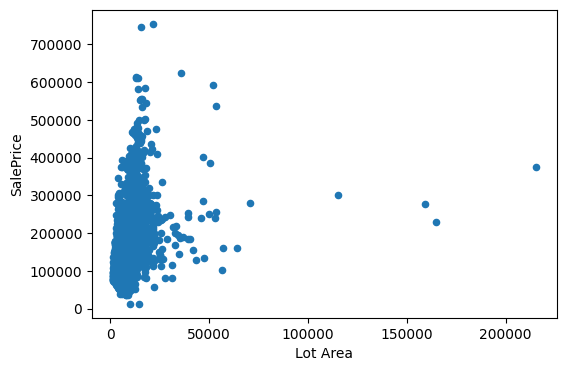

In [68]:
# Visualize the relationship between Lot Area and Sale Price
fig, ax = plt.subplots(figsize=(6, 4))
(df
    .plot.scatter(x='Lot Area', y='SalePrice', ax=ax)
)

<Axes: xlabel='Lot Area', ylabel='SalePrice'>

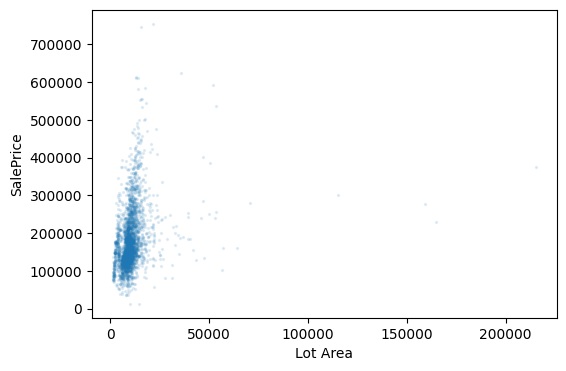

In [70]:
# Visualize the relationship between Lot Area and Sale Price
fig, ax = plt.subplots(figsize=(6, 4))
(df
    .plot.scatter(x='Lot Area', y='SalePrice', ax=ax, alpha=0.1, s=2)
)

<Axes: ylabel='Frequency'>

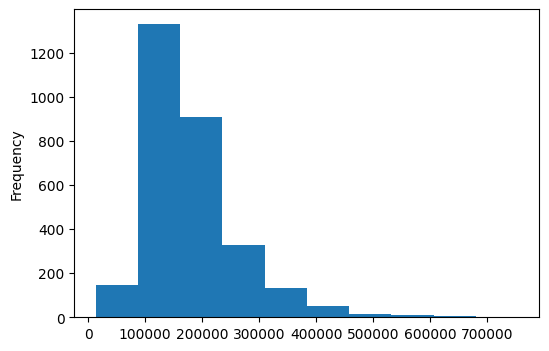

In [71]:
# sales price histogram
(df
 .SalePrice
 .plot.hist(figsize=(6, 4))
)

## 1.3 Challenge

**Challenge**: Now it's your turn to explore and prepare the Ames Housing dataset for modeling.

Tasks:
1. Load the Ames Housing dataset from the provided URL
2. Perform exploratory data analysis:
   - Create a histogram of the *SalePrice* variable with `.plot.hist()`
   - Use `.corr` to find the top 5 numerical features most correlated with *SalePrice*

## 1.4 Solution: Load, Explore, & Clean Data

In [22]:
# 1. Load the Ames Housing dataset from the provided URL
url = "https://github.com/mattharrison/datasets/raw/master/data/ames-housing-dataset.zip"
cols = ['Lot Area', 'Neighborhood', 'Overall Qual', 'Year Built',
    'Total Bsmt SF', 'Gr Liv Area', '2nd Flr SF', 'Bsmt Full Bath',
    'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
    'Garage Cars', 'Pool Area', 'SalePrice']

solution_df = pd.read_csv(url, compression='zip').loc[:, cols]
print("Dataset loaded successfully.")

Dataset loaded successfully.


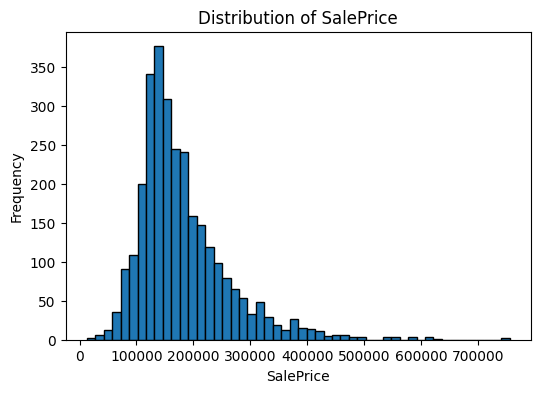

In [73]:
# 2. Perform exploratory data analysis:
#    - Create a histogram of the SalePrice variable
fig, ax = plt.subplots(figsize=(6, 4))
(solution_df
 .loc[:, 'SalePrice']
 .plot.hist(bins=50, edgecolor='black', ax=ax)
)
ax.set_title('Distribution of SalePrice')
ax.set_xlabel('SalePrice')
ax.set_ylabel('Frequency')
plt.show()



In [74]:
#    - Use .corr to find the top 5 numerical features most correlated with SalePrice

(solution_df
.corr()
)

ValueError: could not convert string to float: 'NAmes'

In [75]:
#    - Use .corr to find the top 5 numerical features most correlated with SalePrice
(solution_df
.select_dtypes(include='number')
.corr()
)

,Lot Area,Overall Qual,Year Built,Total Bsmt SF,Gr Liv Area,2nd Flr SF,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Garage Cars,Pool Area,SalePrice
Lot Area,1.000000,0.097188,0.023258,0.253589,0.285599,0.032996,0.125877,0.026903,0.127433,0.035497,0.136569,0.179512,0.093775,0.266549
Overall Qual,0.097188,1.000000,0.597027,0.547294,0.570556,0.241402,0.167858,-0.041647,0.522263,0.268853,0.063291,0.599545,0.030399,0.799262
Year Built,0.023258,0.597027,1.000000,0.407526,0.241726,0.016828,0.211849,-0.030626,0.469406,0.269268,-0.055093,0.537443,0.002213,0.558426
Total Bsmt SF,0.253589,0.547294,0.407526,1.000000,0.444675,-0.205345,0.326232,0.012469,0.324973,-0.055231,0.051941,0.437608,0.072128,0.632280
Gr Liv Area,0.285599,0.570556,0.241726,0.444675,1.000000,0.655251,0.058559,-0.043377,0.630321,0.433949,0.516808,0.488829,0.135463,0.706780
2nd Flr SF,0.032996,0.241402,0.016828,-0.205345,0.655251,1.000000,-0.163579,-0.059605,0.404143,0.611634,0.504651,0.182119,0.044602,0.269373
Bsmt Full Bath,0.125877,0.167858,0.211849,0.326232,0.058559,-0.163579,1.000000,-0.149204,-0.022606,-0.035271,-0.160897,0.162031,0.043705,0.276050
Bsmt Half Bath,0.026903,-0.041647,-0.030626,0.012469,-0.043377,-0.059605,-0.149204,1.000000,-0.046300,-0.057980,0.020494,-0.033505,0.066902,-0.035835
Full Bath,0.127433,0.522263,0.469406,0.324973,0.630321,0.404143,-0.022606,-0.046300,1.000000,0.159689,0.359489,0.478182,0.028205,0.545604
Half Bath,0.035497,0.268853,0.269268,-0.055231,0.433949,0.611634,-0.035271,-0.057980,0.159689,1.000000,0.247053,0.233429,0.001515,0.285056


In [76]:
#    - Use .corr to find the top 5 numerical features most correlated with SalePrice
(solution_df
.select_dtypes(include='number')
.corr()
.style.background_gradient(cmap='RdBu', vmin=-1, vmax=1)
)

,Lot Area,Overall Qual,Year Built,Total Bsmt SF,Gr Liv Area,2nd Flr SF,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Garage Cars,Pool Area,SalePrice
Lot Area,1.000000,0.097188,0.023258,0.253589,0.285599,0.032996,0.125877,0.026903,0.127433,0.035497,0.136569,0.179512,0.093775,0.266549
Overall Qual,0.097188,1.000000,0.597027,0.547294,0.570556,0.241402,0.167858,-0.041647,0.522263,0.268853,0.063291,0.599545,0.030399,0.799262
Year Built,0.023258,0.597027,1.000000,0.407526,0.241726,0.016828,0.211849,-0.030626,0.469406,0.269268,-0.055093,0.537443,0.002213,0.558426
Total Bsmt SF,0.253589,0.547294,0.407526,1.000000,0.444675,-0.205345,0.326232,0.012469,0.324973,-0.055231,0.051941,0.437608,0.072128,0.632280
Gr Liv Area,0.285599,0.570556,0.241726,0.444675,1.000000,0.655251,0.058559,-0.043377,0.630321,0.433949,0.516808,0.488829,0.135463,0.706780
2nd Flr SF,0.032996,0.241402,0.016828,-0.205345,0.655251,1.000000,-0.163579,-0.059605,0.404143,0.611634,0.504651,0.182119,0.044602,0.269373
Bsmt Full Bath,0.125877,0.167858,0.211849,0.326232,0.058559,-0.163579,1.000000,-0.149204,-0.022606,-0.035271,-0.160897,0.162031,0.043705,0.276050
Bsmt Half Bath,0.026903,-0.041647,-0.030626,0.012469,-0.043377,-0.059605,-0.149204,1.000000,-0.046300,-0.057980,0.020494,-0.033505,0.066902,-0.035835
Full Bath,0.127433,0.522263,0.469406,0.324973,0.630321,0.404143,-0.022606,-0.046300,1.000000,0.159689,0.359489,0.478182,0.028205,0.545604
Half Bath,0.035497,0.268853,0.269268,-0.055231,0.433949,0.611634,-0.035271,-0.057980,0.159689,1.000000,0.247053,0.233429,0.001515,0.285056


In [77]:
#    - Use .corr to find the top 5 numerical features most correlated with SalePrice
(solution_df
.select_dtypes(include='number')
.corr()
.sort_values('SalePrice', ascending=False)
.loc[:, ['SalePrice']]
.style.background_gradient(cmap='RdBu', vmin=-1, vmax=1)
)




,SalePrice
SalePrice,1.000000
Overall Qual,0.799262
Gr Liv Area,0.706780
Garage Cars,0.647877
Total Bsmt SF,0.632280
Year Built,0.558426
Full Bath,0.545604
Half Bath,0.285056
Bsmt Full Bath,0.276050
2nd Flr SF,0.269373


In [78]:
numerical_cols = solution_df.select_dtypes(include=np.number).columns
correlations = (solution_df
                .loc[:, numerical_cols]
                .corr()
                .loc['SalePrice']
                .abs()
                .sort_values(ascending=False)
               )
top_5_correlated_features = correlations.drop('SalePrice').head(5)
print("\nTop 5 numerical features most correlated with SalePrice:")
print(top_5_correlated_features)


Top 5 numerical features most correlated with SalePrice:
Overall Qual     0.799262
Gr Liv Area      0.706780
Garage Cars      0.647877
Total Bsmt SF    0.632280
Year Built       0.558426
Name: SalePrice, dtype: float64



# Chapter 2: Building a Linear Regression Model

## 2.1 Overview

Linear Regression is one of the simplest and most interpretable models for value estimation. In this section, we'll learn how to implement it for our housing price prediction task.

Linear Regression works by finding the best-fitting straight line through the data points, where:
- The line is represented by the equation: y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ
- y is the target variable (SalePrice in our case)
- x₁, x₂, ..., xₙ are the features (house characteristics)
- β₀, β₁, β₂, ..., βₙ are the coefficients the model learns

Advantages of Linear Regression:
- Simple and interpretable: The coefficients tell us how much each feature affects the prediction
- Fast to train and make predictions
- Works well when the relationship between features and target is approximately linear

Limitations:
- Cannot capture complex non-linear relationships
- Sensitive to outliers
- Assumes features are independent (no multicollinearity)

For our housing price prediction task, we'll use scikit-learn's implementation of Linear Regression.

In [86]:
# ## 2.2 Train Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Load the full dataset for comprehensive preprocessing
url = "https://github.com/mattharrison/datasets/raw/master/data/ames-housing-dataset.zip"
full_df = pd.read_csv(url)#, compression='zip')
features = ['Lot Area', 'Neighborhood', 'Overall Qual', 'Year Built',
    'Total Bsmt SF', 'Gr Liv Area', '2nd Flr SF', 'Bsmt Full Bath',
    'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
    'Garage Cars', 'Pool Area']

# Define target and features
y = full_df['SalePrice']
X = (full_df
.loc[:, features]    
)

In [87]:

# Identify numerical and categorical columns
#categorical_features = X.select_dtypes(include='object').columns.tolist()
numerical_features = ['Lot Area', 'Overall Qual', 'Year Built',
    'Total Bsmt SF', 'Gr Liv Area', '2nd Flr SF', 'Bsmt Full Bath',
    'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
    'Garage Cars', 'Pool Area']
categorical_features = ['Neighborhood']

In [88]:
# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Impute missing numerical values with median
    ('scaler', StandardScaler()) # Scale numerical features
])

numerical_transformer.fit_transform(X[numerical_features])

,Lot Area,Overall Qual,Year Built,Total Bsmt SF,Gr Liv Area,2nd Flr SF,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Garage Cars,Pool Area
0,2.744381,-0.067254,-0.375537,0.064492,0.309265,-0.783185,1.084376,-0.249220,-1.024793,-0.755203,0.176094,0.306589,-0.063031
1,0.187097,-0.776079,-0.342468,-0.385032,-1.194427,-0.783185,-0.821576,-0.249220,-1.024793,-0.755203,-1.032234,-1.008648,-0.063031
2,0.522814,-0.067254,-0.441674,0.629802,-0.337718,-0.783185,-0.821576,-0.249220,-1.024793,1.234675,0.176094,-1.008648,-0.063031
3,0.128458,0.641571,-0.110988,2.402924,1.207523,-0.783185,1.084376,-0.249220,0.784028,1.234675,0.176094,0.306589,-0.063031
4,0.467348,-0.776079,0.848000,-0.280597,0.255844,0.853432,-0.821576,-0.249220,0.784028,1.234675,0.176094,0.306589,-0.063031
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,-0.280621,-0.067254,0.418109,-0.110323,-0.982723,-0.783185,1.084376,-0.249220,-1.024793,-0.755203,0.176094,0.306589,-0.063031
2926,-0.160296,-0.776079,0.385040,-0.425898,-1.182556,-0.783185,1.084376,-0.249220,-1.024793,-0.755203,-1.032234,0.306589,-0.063031
2927,0.037199,-0.776079,0.682657,-0.316922,-1.048015,-0.783185,-0.821576,3.830195,-1.024793,-0.755203,0.176094,-2.323886,-0.063031
2928,-0.017506,-0.776079,0.087423,0.766021,-0.219006,-0.783185,1.084376,-0.249220,-1.024793,-0.755203,-1.032234,0.306589,-0.063031


In [89]:
# set output to pandas DataFrame
from sklearn import set_config
set_config(transform_output='pandas')

In [90]:
# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Impute missing numerical values with median
    ('scaler', StandardScaler()) # Scale numerical features
])

numerical_transformer.fit_transform(X[numerical_features]).describe()

,Lot Area,Overall Qual,Year Built,Total Bsmt SF,Gr Liv Area,2nd Flr SF,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Garage Cars,Pool Area
0,2.744381,-0.067254,-0.375537,0.064492,0.309265,-0.783185,1.084376,-0.249220,-1.024793,-0.755203,0.176094,0.306589,-0.063031
1,0.187097,-0.776079,-0.342468,-0.385032,-1.194427,-0.783185,-0.821576,-0.249220,-1.024793,-0.755203,-1.032234,-1.008648,-0.063031
2,0.522814,-0.067254,-0.441674,0.629802,-0.337718,-0.783185,-0.821576,-0.249220,-1.024793,1.234675,0.176094,-1.008648,-0.063031
3,0.128458,0.641571,-0.110988,2.402924,1.207523,-0.783185,1.084376,-0.249220,0.784028,1.234675,0.176094,0.306589,-0.063031
4,0.467348,-0.776079,0.848000,-0.280597,0.255844,0.853432,-0.821576,-0.249220,0.784028,1.234675,0.176094,0.306589,-0.063031
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,-0.280621,-0.067254,0.418109,-0.110323,-0.982723,-0.783185,1.084376,-0.249220,-1.024793,-0.755203,0.176094,0.306589,-0.063031
2926,-0.160296,-0.776079,0.385040,-0.425898,-1.182556,-0.783185,1.084376,-0.249220,-1.024793,-0.755203,-1.032234,0.306589,-0.063031
2927,0.037199,-0.776079,0.682657,-0.316922,-1.048015,-0.783185,-0.821576,3.830195,-1.024793,-0.755203,0.176094,-2.323886,-0.063031
2928,-0.017506,-0.776079,0.087423,0.766021,-0.219006,-0.783185,1.084376,-0.249220,-1.024793,-0.755203,-1.032234,0.306589,-0.063031


In [91]:
# validate mean 0 and std 1
numerical_transformer.fit_transform(X[numerical_features]).describe()

,Lot Area,Overall Qual,Year Built,Total Bsmt SF,Gr Liv Area,2nd Flr SF,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Garage Cars,Pool Area
count,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03
mean,5.820145e-17,-8.002700e-17,-2.141328e-15,-1.697542e-16,3.637591e-17,4.971374e-17,-1.455036e-17,6.183904e-17,4.122603e-17,2.303808e-17,1.697542e-17,1.018525e-16,-1.455036e-17
std,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00
min,-1.123022e+00,-3.611379e+00,-3.285571e+00,-2.387456e+00,-2.306368e+00,-7.831853e-01,-8.215756e-01,-2.492202e-01,-2.833614e+00,-7.552027e-01,-3.448890e+00,-2.323886e+00,-6.303105e-02
25%,-3.436711e-01,-7.760788e-01,-5.739484e-01,-5.870906e-01,-7.393623e-01,-7.831853e-01,-8.215756e-01,-2.492202e-01,-1.024793e+00,-7.552027e-01,-1.032234e+00,-1.008648e+00,-6.303105e-02
50%,-9.029717e-02,-6.725371e-02,5.435434e-02,-1.398371e-01,-1.141430e-01,-7.831853e-01,-8.215756e-01,-2.492202e-01,7.840283e-01,-7.552027e-01,1.760942e-01,3.065895e-01,-6.303105e-02
75%,1.786250e-01,6.415714e-01,9.802742e-01,5.673682e-01,4.809036e-01,8.598520e-01,1.084376e+00,-2.492202e-01,7.840283e-01,1.234675e+00,1.760942e-01,3.065895e-01,-6.303105e-02
max,2.603193e+01,2.768047e+00,1.277891e+00,1.148421e+01,8.195734e+00,4.037947e+00,4.896278e+00,7.909610e+00,4.401671e+00,3.224553e+00,6.217734e+00,4.252302e+00,2.241449e+01


In [92]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), # Impute missing categorical values with 'missing'
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # One-hot encode categorical features
])
categorical_transformer.fit_transform(X[categorical_features])

ValueError: Pandas output does not support sparse data. Set sparse_output=False to output pandas dataframes or disable Pandas output via` ohe.set_output(transform="default").

In [93]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), # Impute missing categorical values with 'missing'
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False, 
                             drop='first', max_categories=5, 
                             )) # One-hot encode categorical features
])
categorical_transformer.fit_transform(X[categorical_features])

,Neighborhood_Edwards,Neighborhood_NAmes,Neighborhood_OldTown,Neighborhood_infrequent_sklearn
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
2925,0.0,0.0,0.0,1.0
2926,0.0,0.0,0.0,1.0
2927,0.0,0.0,0.0,1.0
2928,0.0,0.0,0.0,1.0


In [94]:

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

preprocessor.fit_transform(X)

,num__Lot Area,num__Overall Qual,num__Year Built,num__Total Bsmt SF,num__Gr Liv Area,num__2nd Flr SF,num__Bsmt Full Bath,num__Bsmt Half Bath,num__Full Bath,num__Half Bath,num__Bedroom AbvGr,num__Garage Cars,num__Pool Area,cat__Neighborhood_Edwards,cat__Neighborhood_NAmes,cat__Neighborhood_OldTown,cat__Neighborhood_infrequent_sklearn
0,2.744381,-0.067254,-0.375537,0.064492,0.309265,-0.783185,1.084376,-0.249220,-1.024793,-0.755203,0.176094,0.306589,-0.063031,0.0,1.0,0.0,0.0
1,0.187097,-0.776079,-0.342468,-0.385032,-1.194427,-0.783185,-0.821576,-0.249220,-1.024793,-0.755203,-1.032234,-1.008648,-0.063031,0.0,1.0,0.0,0.0
2,0.522814,-0.067254,-0.441674,0.629802,-0.337718,-0.783185,-0.821576,-0.249220,-1.024793,1.234675,0.176094,-1.008648,-0.063031,0.0,1.0,0.0,0.0
3,0.128458,0.641571,-0.110988,2.402924,1.207523,-0.783185,1.084376,-0.249220,0.784028,1.234675,0.176094,0.306589,-0.063031,0.0,1.0,0.0,0.0
4,0.467348,-0.776079,0.848000,-0.280597,0.255844,0.853432,-0.821576,-0.249220,0.784028,1.234675,0.176094,0.306589,-0.063031,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,-0.280621,-0.067254,0.418109,-0.110323,-0.982723,-0.783185,1.084376,-0.249220,-1.024793,-0.755203,0.176094,0.306589,-0.063031,0.0,0.0,0.0,1.0
2926,-0.160296,-0.776079,0.385040,-0.425898,-1.182556,-0.783185,1.084376,-0.249220,-1.024793,-0.755203,-1.032234,0.306589,-0.063031,0.0,0.0,0.0,1.0
2927,0.037199,-0.776079,0.682657,-0.316922,-1.048015,-0.783185,-0.821576,3.830195,-1.024793,-0.755203,0.176094,-2.323886,-0.063031,0.0,0.0,0.0,1.0
2928,-0.017506,-0.776079,0.087423,0.766021,-0.219006,-0.783185,1.084376,-0.249220,-1.024793,-0.755203,-1.032234,0.306589,-0.063031,0.0,0.0,0.0,1.0


In [95]:

# Create the full pipeline with preprocessing and Linear Regression model
lr_model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('regressor', LinearRegression())])

lr_model_pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Lot Area', 'Overall Qual',
                                                   'Year Built',
                                                   'Total Bsmt SF',
                                                   'Gr Liv Area', '2nd Flr SF',
                                                   'Bsmt Full Bath',
                                                   'Bsmt Half Bath',
                                                   'Full Bath', 'Half Bath',
                                                   'Bedroom AbvGr',
                                                   'Garage Cars',
                                                   'Pool Area']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 max_categories=5,
                                                                                 sparse_output=False))]),
                                                  ['Neighborhood'])])),
                ('regressor', LinearRegression())])

In [96]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
X_train

,Lot Area,Neighborhood,Overall Qual,Year Built,Total Bsmt SF,Gr Liv Area,2nd Flr SF,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Garage Cars,Pool Area
381,10400,NWAmes,7,1976,1090.0,1370,0,0.0,0.0,2,0,3,2.0,0
834,28698,ClearCr,5,1967,1013.0,2126,966,0.0,1.0,2,1,3,2.0,0
1898,9842,NAmes,4,1962,0.0,1224,0,0.0,0.0,2,0,2,2.0,0
678,7200,NAmes,4,1949,0.0,1040,0,0.0,0.0,2,0,2,2.0,0
700,7627,OldTown,4,1920,600.0,1701,600,0.0,0.0,2,0,4,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,41600,Gilbert,5,1969,1100.0,1424,0,1.0,0.0,1,1,3,3.0,0
1095,7750,Gilbert,7,2002,707.0,1414,707,0.0,0.0,2,1,3,2.0,0
1130,8791,Somerst,6,2003,864.0,1728,864,0.0,0.0,2,1,3,2.0,0
1294,7308,OldTown,5,1920,936.0,1740,780,0.0,0.0,1,0,2,1.0,0


In [98]:
y_train

381     152000
834     185000
1898    101800
678      90000
700      94550
         ...  
1638    155000
1095    176000
1130    207500
1294    122250
860     133900
Name: SalePrice, Length: 2344, dtype: int64

In [99]:

# Train the Linear Regression model pipeline
print("Training Linear Regression model pipeline...")
lr_model_pipeline.fit(X_train, y_train)



Training Linear Regression model pipeline...


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Lot Area', 'Overall Qual',
                                                   'Year Built',
                                                   'Total Bsmt SF',
                                                   'Gr Liv Area', '2nd Flr SF',
                                                   'Bsmt Full Bath',
                                                   'Bsmt Half Bath',
                                                   'Full Bath', 'Half Bath',
                                                   'Bedroom AbvGr',
                                                   'Garage Cars',
                                                   'Pool Area']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 max_categories=5,
                                                                                 sparse_output=False))]),
                                                  ['Neighborhood'])])),
                ('regressor', LinearRegression())])

## 2.3 Evaluate Model
Now that we've trained our Linear Regression model, let's evaluate its performance on the test set

In [100]:
# Make predictions on the test set
y_test_pred = lr_model_pipeline.predict(X_test)

In [101]:
# Calculate test metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest set metrics:")
print(f"Mean Squared Error (MSE): {test_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.4f}")
print(f"Mean Absolute Error (MAE): {test_mae:.4f}")
print(f"R² Score: {test_r2:.4f}")


Test set metrics:
Mean Squared Error (MSE): 1498715067.7345
Root Mean Squared Error (RMSE): 38713.2415
Mean Absolute Error (MAE): 23972.1044
R² Score: 0.8131


In [102]:
# Calculate training metrics
y_train_pred = lr_model_pipeline.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)



In [103]:
# Compare training and test metrics
# Note: train_mse, train_rmse, train_mae, train_r2 are calculated in 2.2
metrics_comparison = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R²'],
    'Training': [train_mse, train_rmse, train_mae, train_r2],
    'Test': [test_mse, test_rmse, test_mae, test_r2]
})
print("\nTraining vs Test Metrics:")
metrics_comparison


Training vs Test Metrics:


,Metric,Training,Test
0,MSE,1.174373e+09,1.498715e+09
1,RMSE,3.426912e+04,3.871324e+04
2,MAE,2.229817e+04,2.397210e+04
3,R²,8.024850e-01,8.130706e-01


Text(0.5, 0, 'Actual SalePrice')

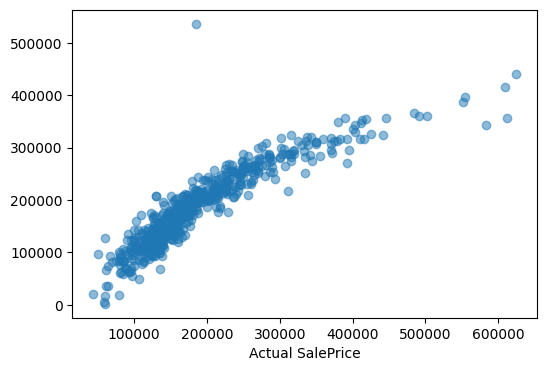

In [104]:
# Visualize the predicted vs actual values on the test set
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel('Actual SalePrice')

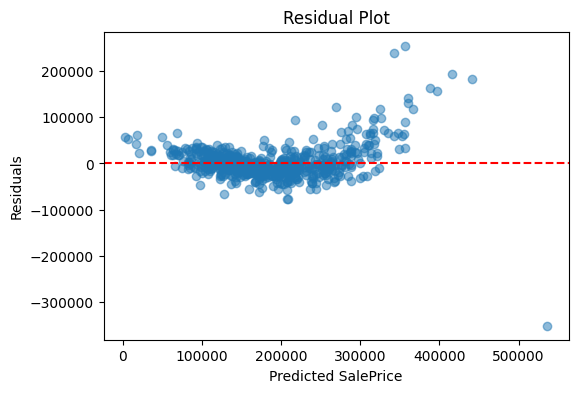

In [105]:
# Visualize residuals (errors)
residuals = y_test - y_test_pred
plt.figure(figsize=(6, 4))
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

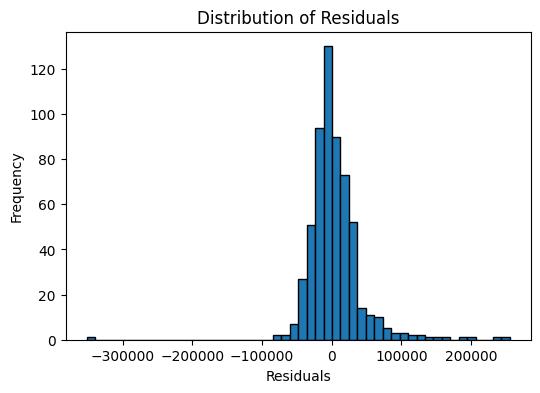

In [106]:
# Distribution of residuals
fig, ax = plt.subplots(figsize=(6, 4))
pd.Series(residuals).plot.hist(bins=50, edgecolor='black', ax=ax)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [108]:
#Compare model to a dummy model
from sklearn.dummy import DummyRegressor
dummy_model = DummyRegressor(strategy='mean')
dummy_model.fit(X_train, y_train)
dummy_model.score(X_test, y_test)

-0.015282546687198861

In [109]:
lr_model_pipeline.score(X_test, y_test)

0.8130706444601397

## 2.4 Make Predictions
Let's use our trained model to make predictions on new data

In [111]:
# Create a function to preprocess new data and make predictions
def predict_house_price(house_features: dict, model: Pipeline) -> float:
    """
    Predict the price of a house using the trained linear regression model pipeline.
    
    Parameters:
    -----------
    house_features : dict
        Dictionary containing house features. Keys should match original feature names.
    model : Pipeline
        Trained linear regression model pipeline.
        
    Returns:
    --------
    float
        Predicted house price.
    """
    # Create a DataFrame from the input data
    # Ensure all expected features are present, fill with NaN if not, pipeline will handle imputation
    input_df = pd.DataFrame([house_features])
    
    # Make prediction using the pipeline
    price_pred = model.predict(input_df)[0]
        
    return price_pred

In [112]:
# Example: Let's predict the price of a sample house
sample_house_raw_features = {
    'Lot Area': 10000,
    'Neighborhood': 'CollgCr', # Example categorical feature
    'Overall Qual': 7,  # Good quality
    'Year Built': 2000,  # Built in 2000
    'Total Bsmt SF': 1000,  # 1000 sq ft basement
    'Gr Liv Area': 2000,  # 2000 sq ft above ground living area
    '2nd Flr SF': 800,
    'Bsmt Full Bath': 1,
    'Bsmt Half Bath': 0,
    'Full Bath': 2,
    'Half Bath': 1,
    'Bedroom AbvGr': 3,
    'Garage Cars': 2,  # 2-car garage
    'Pool Area': 0,
}

# Predict the house price
predicted_price = predict_house_price(sample_house_raw_features, lr_model_pipeline)
print(f"\nPredicted price for the sample house: ${predicted_price:,.2f}")


Predicted price for the sample house: $239,509.53


In [113]:
# Let's try a few more examples with different characteristics
houses_to_predict = [
    {
        'Lot Area': 15000,
        'Neighborhood': 'NridgHt', # Luxury neighborhood
        'Overall Qual': 9,  # Excellent quality
        'Year Built': 2015,  # Built in 2015
        'Total Bsmt SF': 1500,  # 1500 sq ft basement
        'Gr Liv Area': 3500,  # 3500 sq ft above ground living area
        '2nd Flr SF': 1000,
        'Bsmt Full Bath': 2,
        'Bsmt Half Bath': 0,
        'Full Bath': 3,
        'Half Bath': 1,
        'Bedroom AbvGr': 4,
        'Garage Cars': 3,  # 3-car garage
        'Pool Area': 0,
    },
    {
        'Lot Area': 7000,
        'Neighborhood': 'BrkSide', # More affordable neighborhood
        'Overall Qual': 5,  # Average quality
        'Year Built': 1970,  # Built in 1970
        'Total Bsmt SF': 600,  # 600 sq ft basement
        'Gr Liv Area': 1200,  # 1200 sq ft above ground living area
        '2nd Flr SF': 0,
        'Bsmt Full Bath': 0,
        'Bsmt Half Bath': 0,
        'Full Bath': 1,
        'Half Bath': 0,
        'Bedroom AbvGr': 2,
        'Garage Cars': 1,  # 1-car garage
        'Pool Area': 0,
    }
]

# Predict prices for these houses
print("\nPredicted prices for different houses:")
for i, house in enumerate(houses_to_predict):
    price = predict_house_price(house, lr_model_pipeline)
    print(f"House {i+1}: ${price:,.2f}")


Predicted prices for different houses:
House 1: $412,719.47
House 2: $125,812.81


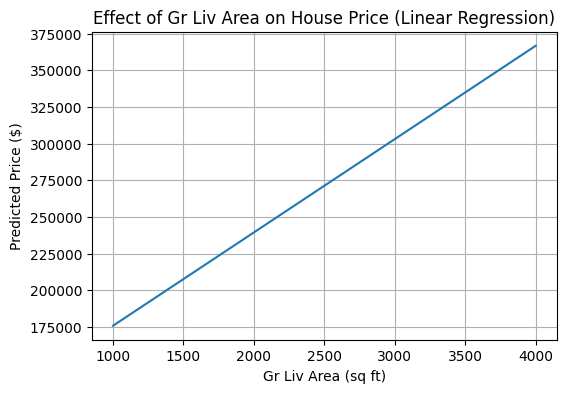

In [114]:
# Visualize the impact of key features on house price
# Let's vary one feature while keeping others constant
base_house = sample_house_raw_features.copy()
feature_to_vary = 'Gr Liv Area' # Using original feature name
values_to_try = np.linspace(1000, 4000, 10)  # Try different living areas from 1000 to 4000 sq ft

prices = []
for value in values_to_try:
    test_house = base_house.copy()
    test_house[feature_to_vary] = value
    price = predict_house_price(test_house, lr_model_pipeline)
    prices.append(price)

plt.figure(figsize=(6, 4))
plt.plot(values_to_try, prices)
plt.xlabel(f'{feature_to_vary} (sq ft)')
plt.ylabel('Predicted Price ($)')
plt.title(f'Effect of {feature_to_vary} on House Price (Linear Regression)')
plt.grid(True)
plt.show()

## 2.5 Challenge: Implement a Linear Regression Model

**Challenge**: Build a complete linear regression pipeline for predicting house prices. Your solution should:
Add the numerical coumn *Garage Area* and the categorical columns *MS Zoning* and *Foundation* to the features.
1.  Load the full Ames Housing dataset.
2.  Define your target variable (`SalePrice`) and features.
3.  Create a preprocessing pipeline that handles:
    *   Missing numerical values (e.g., median imputation).
    *   Scaling numerical features (e.g., StandardScaler).
    *   Missing categorical values (e.g., constant imputation).
    *   One-hot encoding categorical features.
4.  Combine the preprocessor with a `LinearRegression` model into a single `Pipeline`.
5.  Split your data into training and testing sets.
6.  Train the pipeline on the training data.
7.  Evaluate the model's performance on both training and test sets using metrics like MSE, RMSE, MAE, and R².
8.  Compare your model's performance with the new columns to the previous model.


## 2.6 Solution: Implement a Linear Regression Model





# Chapter 3: Building an XGBoost Model

## 3.1 Overview

XGBoost (eXtreme Gradient Boosting) is a powerful machine learning algorithm that has dominated many Kaggle competitions and real-world applications. It's an implementation of gradient boosted decision trees designed for speed and performance.

Key advantages of XGBoost:
- High performance: Optimized for both training speed and prediction accuracy
- Regularization: Built-in L1 (Lasso) and L2 (Ridge) regularization to prevent overfitting
- Handles missing values: No need for extensive preprocessing
- Tree pruning: Uses a depth-first approach to grow trees and prune them
- Parallel processing: Utilizes multiple cores for faster computation
- Feature importance: Provides insights into which features contribute most to predictions

How XGBoost works:
1. Builds an ensemble of decision trees sequentially
2. Each new tree corrects the errors made by the previous trees
3. Uses gradient descent to minimize a loss function
4. Combines predictions from all trees for the final prediction

For our housing price prediction task, XGBoost can capture complex non-linear relationships between features and house prices that Linear Regression might miss.

In [115]:
# ## 3.2 Train Model
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split

url = "https://github.com/mattharrison/datasets/raw/master/data/ames-housing-dataset.zip"
df = pd.read_csv(url, compression='zip')


# split the data into training and testing sets
cols = ['Lot Area', 'Neighborhood', 'Overall Qual', 'Year Built',
    'Total Bsmt SF', 'Gr Liv Area', '2nd Flr SF', 'Bsmt Full Bath',
    'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
    'Garage Cars', 'Pool Area', 'SalePrice']
X = (df.loc[:, cols]
     .astype({'Neighborhood': 'category'})
     .drop(columns='SalePrice')
)
y = df.loc[:, 'SalePrice']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,
                                                     stratify=pd.qcut(y, 10))

In [116]:
xg = xgb.XGBRegressor(enable_categorical=True, random_state=42)
xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [117]:
# linear regression was .8131
xg.score(X_test, y_test)

0.8711183667182922

## 3.3 Evaluate Model
Let's evaluate our XGBoost model on both training and test sets
print(f'Training R²: {xg.score(X_train, y_train):.4f}')
print(f'Test R²: {xg.score(X_test, y_test):.4f}')

In [118]:

# Tune with sk-stepwise
#from sk_stepwise import StepwiseHyperoptOptimizer
import sk_stepwise
import importlib
importlib.reload(sk_stepwise)

import hyperopt

param_space_sequence = [ 
    # tree parameters
    {'max_depth': hyperopt.hp.quniform('max_depth', 1, 8, 1), 
    'min_child_weight': hyperopt.hp.loguniform('min_child_weight', -2, 3)},
    # sampling parameters
    {'subsample': hyperopt.hp.uniform('subsample', 0.5, 1), 
    'colsample_bytree': hyperopt.hp.uniform('colsample_bytree', 0.5, 1)},
    # regularization parameters
    {'reg_alpha': hyperopt.hp.uniform('reg_alpha', 0, 10), 
    'reg_lambda': hyperopt.hp.uniform('reg_lambda', 1, 10),
    'gamma': hyperopt.hp.loguniform('gamma', -10, 10)},
    # learning rate
    {'learning_rate': hyperopt.hp.loguniform('learning_rate', -5, 0)}
    ]
default_kwargs={
    'early_stopping_rounds': 10,
    'n_estimators': 2000,
    'enable_categorical': True,
    'random_state': 42
}

xg_tuned = xgb.XGBRegressor(**default_kwargs)
tuner = sk_stepwise.StepwiseHyperoptOptimizer(xg_tuned, param_space_sequence=param_space_sequence,
                                      max_evals_per_step=20, 
                                      )

tuner.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
          verbose=False)

Optimizing step 1/4
100%|██████████| 20/20 [00:10<00:00,  1.88trial/s, best loss: -0.9004690766334533]
Best parameters after step 1: {'max_depth': 3, 'min_child_weight': 0.7656272814148452}
Best score after step 1: 0.9004690766334533
Optimizing step 2/4
100%|██████████| 20/20 [00:09<00:00,  2.02trial/s, best loss: -0.9022107005119324]
Best parameters after step 2: {'max_depth': 3, 'min_child_weight': 0.7656272814148452, 'colsample_bytree': 0.5351439014258814, 'subsample': 0.9735366431482925}
Best score after step 2: 0.9022107005119324
Optimizing step 3/4
100%|██████████| 20/20 [00:11<00:00,  1.76trial/s, best loss: -0.90218745470047] 
Best parameters after step 3: {'max_depth': 3, 'min_child_weight': 0.7656272814148452, 'colsample_bytree': 0.5351439014258814, 'subsample': 0.9735366431482925, 'gamma': 50.89334674149027, 'reg_alpha': 7, 'reg_lambda': 1.8782631641857996}
Best score after step 3: 0.90218745470047
Optimizing step 4/4
100%|██████████| 20/20 [00:36<00:00,  1.80s/trial, best l

StepwiseHyperoptOptimizer(model=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5351439014258814, device=None,
             early_stopping_rounds=10, enable_categorical=True,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=50.89334674149027, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.07087625540938508,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=0.7656272814148452, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=2000,
             n_jobs=None, num_parallel_tree=None, ...), param_space_sequence=[{'max_depth': <hyperopt.pyll.base.Apply object at 0x15a25ff20>, 'min_child_weight': <hyperopt.pyll.base.Apply object at 0x15a25d820>}, {'subsample': <hyperopt.pyll.base.Apply object at 0x15a25d8e0>, 'colsample_bytree': <hyperopt.pyll.base.Apply object at 0x15a25fe90>}, {'reg_alpha': <hyperopt.pyll.base.Apply object at 0x15a25fec0>, 'reg_lambda': <hyperopt.pyll.base.Apply object at 0x15a25fd10>, 'gamma': <hyperopt.pyll.base.Apply object at 0x15a25fb00>}, {'learning_rate': <hyperopt.pyll.base.Apply object at 0x15a25f980>}], max_evals_per_step=20, cv=5, scoring='neg_mean_squared_error', random_state=42, best_params_={'max_depth': 3, 'min_child_weight': 0.7656272814148452, 'colsample_bytree': 0.5351439014258814, 'subsample': 0.9735366431482925, 'gamma': 50.89334674149027, 'reg_alpha': 7, 'reg_lambda': 1.8782631641857996, 'learning_rate': 0.07087625540938508}, best_score_=0.9017141461372375)

In [119]:
# Get the best parameters
tuner.best_params_

{'max_depth': 3,
 'min_child_weight': 0.7656272814148452,
 'colsample_bytree': 0.5351439014258814,
 'subsample': 0.9735366431482925,
 'gamma': 50.89334674149027,
 'reg_alpha': 7,
 'reg_lambda': 1.8782631641857996,
 'learning_rate': 0.07087625540938508}

In [120]:
params = {'max_depth': 3,
 'min_child_weight': 0.17222256398182292,
 'colsample_bytree': 0.9470133028989315,
 'subsample': 0.9652148363459232,
 'gamma': 16993.810573561244,
 'reg_alpha': 0,
 'reg_lambda': 3.1672429736910677,
 'learning_rate': 0.06277558457711835}

default_kwargs={
    'early_stopping_rounds': 10,
    'n_estimators': 2000,
    'enable_categorical': True,
    'random_state': 42
}

xg_tuned = xgb.XGBRegressor(**params, **default_kwargs)
xg_tuned.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9470133028989315, device=None,
             early_stopping_rounds=10, enable_categorical=True,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=16993.810573561244, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.06277558457711835,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=0.17222256398182292, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=2000,
             n_jobs=None, num_parallel_tree=None, ...)

In [121]:
# number of trees
xg_tuned.best_iteration

319

In [122]:
print(f'Training R²: {xg_tuned.score(X_train, y_train):.4f}')
print(f'Test R²: {xg_tuned.score(X_test, y_test):.4f}')

Training R²: 0.9576
Test R²: 0.8932


(-200000.0, 200000.0)

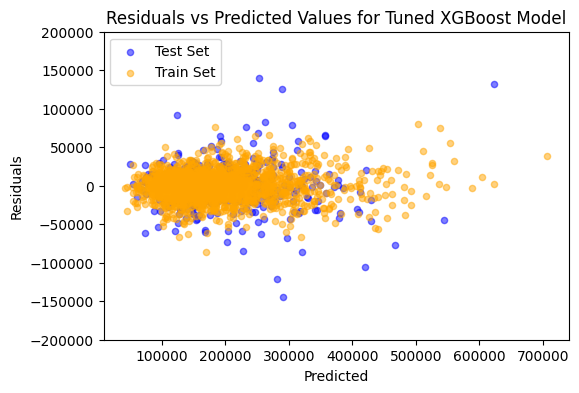

In [123]:
# plot residuals
import matplotlib.pyplot as plt

y_test_xgb = y_test
y_test_pred_xgb = xg_tuned.predict(X_test)
residuals_xgb = y_test_xgb - y_test_pred_xgb
fig, ax = plt.subplots(figsize=(6, 4))
ax = (pd.Series(residuals_xgb, name='Residuals')
 .to_frame()
 .assign(Predicted=y_test_pred_xgb)
    .plot.scatter(x='Predicted', y='Residuals', ax=ax, alpha=0.5,
                  c='blue', label='Test Set')
)
# plot training residuals
y_train_xgb = y_train
y_train_pred_xgb = xg_tuned.predict(X_train)
residuals_train_xgb = y_train_xgb - y_train_pred_xgb
ax = (pd.Series(residuals_train_xgb, name='Residuals')
 .to_frame()
 .assign(Predicted=y_train_pred_xgb)
    .plot.scatter(x='Predicted', y='Residuals', ax=ax, alpha=0.5,
                  c='orange', label='Train Set')
)

# add title
ax.set_title('Residuals vs Predicted Values for Tuned XGBoost Model')

# set y-axis limits
ax.set_ylim(-200_000, 200_000)

(-200000.0, 200000.0)

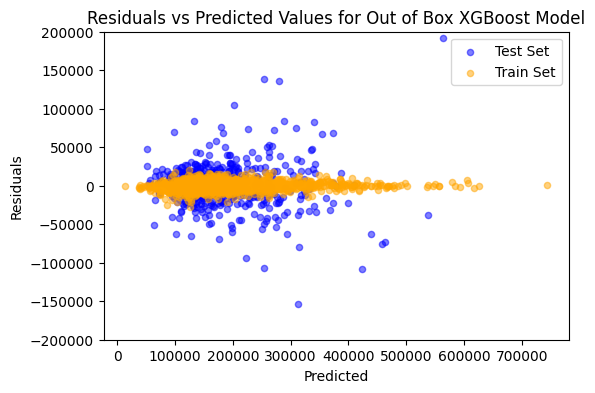

In [129]:
# plot residuals with out of box model
import matplotlib.pyplot as plt

y_test_xgb = y_test
y_test_pred_xgb = xg.predict(X_test)
residuals_xgb = y_test_xgb - y_test_pred_xgb
fig, ax = plt.subplots(figsize=(6,4))
ax = (pd.Series(residuals_xgb, name='Residuals')
 .to_frame()
 .assign(Predicted=y_test_pred_xgb)
    .plot.scatter(x='Predicted', y='Residuals', ax=ax, alpha=0.5,
                  c='blue', label='Test Set')
)
# plot training residuals
y_train_xgb = y_train
y_train_pred_xgb = xg.predict(X_train)
residuals_train_xgb = y_train_xgb - y_train_pred_xgb
ax = (pd.Series(residuals_train_xgb, name='Residuals')
 .to_frame()
 .assign(Predicted=y_train_pred_xgb)
    .plot.scatter(x='Predicted', y='Residuals', ax=ax, alpha=0.5,
                  c='orange', label='Train Set')
)

# add title
ax.set_title('Residuals vs Predicted Values for Out of Box XGBoost Model')

# set y-axis limits
ax.set_ylim(-200_000, 200_000)

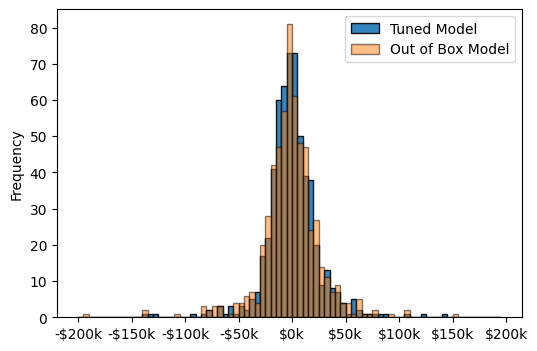

In [128]:
# histogram of tuned model residuals vs out of box model
import numpy as np
fig, ax = plt.subplots(figsize=(6,4))
bins = list(range(-200_000, 200_000, 5_000))
tuned_residuals = pd.Series(xg_tuned.predict(X_test) - y_test, 
    name='Tuned Residuals')

out_of_box_residuals = pd.Series(xg.predict(X_test) - y_test,
    name='Out of Box Residuals')

tuned_residuals.plot.hist(bins=bins, edgecolor='black', ax=ax, 
                          alpha=0.9,
                          label='Tuned Model')
out_of_box_residuals.plot.hist(bins=bins, edgecolor='black', ax=ax, alpha=0.5,
                               label='Out of Box Model')

ax.legend()

# format x-axis in $k with commas using a function
def format_func(value, tick_number):
    # put negative sign left of the $
    if value < 0:
        return f'-${abs(value)/1_000:,.0f}k'
    return f'${value/1_000:,.0f}k'
    
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
#ax.xaxis.set_major_formatter('${x/1_000:,.0f}k')

# 



## 3.4 Make Predictions
Let's use our trained XGBoost model to make predictions on new data

In [130]:
X_test.iloc[[0]]

,Lot Area,Neighborhood,Overall Qual,Year Built,Total Bsmt SF,Gr Liv Area,2nd Flr SF,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Garage Cars,Pool Area
795,4235,Edwards,5,1984,1049.0,1049,0,1.0,0.0,2,0,2,1.0,0


In [131]:
xg_tuned.predict(X_test.iloc[[0]])

array([127635.46], dtype=float32)

## 3.5 Challenge: Implement an XGBoost Model

**Challenge**: Build a complete XGBoost pipeline for predicting house prices with the . Include feature engineering, hyperparameter tuning, and model evaluation.
Add the numerical coumn *Garage Area* and the categorical columns *MS Zoning* and *Foundation* to the features.


## 3.6 Solution: Implement an XGBoost Model

# Chapter 4: Deployment


## 4.1 Model Persistence

Instead of MLflow, we'll use `joblib` to save and load our trained models. `joblib` is part of the SciPy ecosystem and is highly efficient for serializing and deserializing Python objects, especially those that internally store large NumPy arrays, which is common in scikit-learn and XGBoost models.

Let's save our trained `xg_tuned` model:

In [ ]:
!mkdir app

In [ ]:
import joblib
import os

# Define the path where the XGBoost model will be saved
MODEL_PATH = "app/xgboost_model_tuned.joblib"

# Save the trained xg_tuned model to a joblib file
try:
    joblib.dump(xg_tuned, MODEL_PATH)
    print(f"Tuned XGBoost model saved to {MODEL_PATH}")
except Exception as e:
    print(f"Error saving model: {e}")

## 4.2 Serving the model

Once we've trained and saved our models, we can serve them for real-time predictions.

Let's implement a simple REST API using Flask to serve our XGBoost model.

**Note**: To run this Flask application, you will need to execute this cell in a Python environment where Flask is installed (`uv add flask`). This code is intended to be run as a separate script or in a dedicated environment, not directly within a Jupyter cell that might block.

In [ ]:
%%writefile app/app.py
from flask import Flask, request, jsonify
import pandas as pd
import numpy as np
import joblib # Changed from pickle
import os

# Create a Flask app instance
app = Flask(__name__)

# Define the path where the XGBoost model will be saved/loaded
MODEL_PATH = "xgboost_model_tuned.joblib" # Changed from .pkl to .joblib

# Load the model globally when the Flask app starts
# This avoids reloading the model for every request
try:
    loaded_model = joblib.load(MODEL_PATH) # Changed from pickle.load
    print(f"Model loaded successfully from {MODEL_PATH}")
except FileNotFoundError:
    print(f"Error: Model file not found at {MODEL_PATH}. Please ensure the model is saved.")
    loaded_model = None # Set to None to indicate failure
except Exception as e:
    print(f"Error loading model: {e}")
    loaded_model = None

# Define prediction endpoint
@app.route('/predict', methods=['POST'])
def predict():
    """
    Receives house features via POST request, makes a prediction using the loaded model,
    and returns the predicted price.
    """
    if loaded_model is None:
        return jsonify({"error": "Model not loaded. Server is not ready for predictions."}), 500

    try:
        # Get the request data (JSON payload)
        data = request.json
        
        # Convert the input dictionary to a Pandas DataFrame
        # Ensure the order of columns matches the training data if the model is sensitive
        # For XGBoost with enable_categorical=True, column order is less critical
        # but it's good practice to maintain consistency.
        # We'll create a DataFrame with the exact columns used for training.
        input_df = pd.DataFrame([data])
        
        # Ensure categorical features are of 'category' dtype if the model expects it
        # This is crucial for XGBoost's enable_categorical=True
        for col in X_train.select_dtypes(include='category').columns:
            if col in input_df.columns:
                input_df[col] = input_df[col].astype('category')
            else:
                # Handle cases where a categorical column might be missing in input
                # XGBoost can handle missing values, but for categorical, it might need a placeholder
                # or ensure the category is known. For simplicity, we'll add it as 'missing' if not present.
                # A more robust solution might involve a preprocessor pipeline.
                input_df[col] = pd.Categorical(['missing'], categories=X_train[col].cat.categories)

        # Reindex input_df to match the order of columns in X_train
        # This is important for consistent feature input to the model
        input_df = input_df.reindex(columns=X_train.columns, fill_value=np.nan)
        
        # Make prediction using the loaded model
        predicted_price = loaded_model.predict(input_df)[0]
        
        # Return the prediction
        return jsonify({
            'predicted_price': float(predicted_price),
            'formatted_price': f"${predicted_price:,.2f}"
        })
    except Exception as e:
        # Log the error for debugging
        print(f"Error during prediction: {e}")
        return jsonify({"error": str(e)}), 400 # Bad request or internal server error

# Define a route for the home page
@app.route('/', methods=['GET'])
def home():
    """
    Provides a simple welcome message and instructions for using the API.
    """
    return """
    <h1>House Price Prediction API</h1>
    <p>Send a POST request to /predict with house features to get a price prediction.</p>
    <p>Example input (JSON):</p>
    <pre>
    {
        "Lot Area": 10000,
        "Neighborhood": "CollgCr",
        "Overall Qual": 7,
        "Year Built": 2000,
        "Total Bsmt SF": 1000,
        "Gr Liv Area": 2000,
        "2nd Flr SF": 800,
        "Bsmt Full Bath": 1,
        "Bsmt Half Bath": 0,
        "Full Bath": 2,
        "Half Bath": 1,
        "Bedroom AbvGr": 3,
        "Garage Cars": 2,
        "Pool Area": 0
    }
    </pre>
    """

# To run the Flask app:
# This block ensures the app runs only when the script is executed directly
# In a production environment, you would use a WSGI server like Gunicorn or uWSGI
if __name__ == '__main__':
    print("Starting the prediction server...")
    # app.run(debug=True, host='0.0.0.0', port=5001)
    # For running in a Jupyter-like environment, you might need to run this
    # in a separate terminal or use a tool like `!flask run` if configured.
    # For this notebook, we'll just show the instructions.
    print("\nTo start the Flask API server, save this file as e.g., `app.py` and run:")
    print("`python app.py` or `flask run --host=0.0.0.0 --port=5001` in your terminal.")
    print("Then, you can send requests to http://localhost:5001/predict")


Run the above by moving into the directory and running:

`uv run python app.py`

In [ ]:

# Example of how to use the API with requests (if the server is running)
# This part is for demonstration and would typically be in a separate client script
print("\nExample code to send a request (run this in a separate Python script/cell AFTER the server is running):")
print("""
import requests
import json

house_features_example = {
    'Lot Area': 10000,
    'Neighborhood': 'CollgCr',
    'Overall Qual': 7,
    'Year Built': 2000,
    'Total Bsmt SF': 1000,
    'Gr Liv Area': 2000,
    '2nd Flr SF': 800,
    'Bsmt Full Bath': 1,
    'Bsmt Half Bath': 0,
    'Full Bath': 2,
    'Half Bath': 1,
    'Bedroom AbvGr': 3,
    'Garage Cars': 2,
    'Pool Area': 0
}

try:
    response = requests.post('http://localhost:5001/predict', json=house_features_example)
    response.raise_for_status() # Raise an exception for HTTP errors
    print(response.json())
except requests.exceptions.ConnectionError:
    print("Error: Could not connect to the Flask server. Is it running?")
except requests.exceptions.RequestException as e:
    print(f"Request failed: {e}")
""")


In [ ]:

# Alternative deployment: Export the model as a Python function
print("\nAlternative deployment: Export the model as a Python function")

# The model is already saved to MODEL_PATH above.
# model_path = "xgboost_model_tuned.joblib" # Already defined as MODEL_PATH

# Function to load the model and make predictions
def predict_house_price_from_file(house_features: dict, model_path: str = MODEL_PATH) -> float:
    """
    Predict the price of a house by loading a model from a file.
    
    Parameters:
    -----------
    house_features : dict
        Dictionary containing house features. Keys should match original feature names.
    model_path : str
        Path to the pickled model file.
        
    Returns:
    --------
    float
        Predicted house price.
    """
    # Load the model
    model = joblib.load(model_path) # Changed from pickle.load
    
    # Create a DataFrame with the house features
    input_df = pd.DataFrame([house_features])
    
    # Ensure categorical features are of 'category' dtype if the model expects it
    for col in X_train.select_dtypes(include='category').columns:
        if col in input_df.columns:
            input_df[col] = input_df[col].astype('category')
        else:
            # Add missing categorical columns with a placeholder if necessary
            input_df[col] = pd.Categorical(['missing'], categories=X_train[col].cat.categories)

    # Reindex input_df to match the order of columns in X_train
    input_df = input_df.reindex(columns=X_train.columns, fill_value=np.nan)

    # Make prediction
    predicted_price = model.predict(input_df)[0]
    
    return predicted_price

# Example usage of the function
sample_house_raw_features_xgb = {
    'Lot Area': 10000,
    'Neighborhood': 'CollgCr',
    'Overall Qual': 7,
    'Year Built': 2000,
    'Total Bsmt SF': 1000,
    'Gr Liv Area': 2000,
    '2nd Flr SF': 800,
    'Bsmt Full Bath': 1,
    'Bsmt Half Bath': 0,
    'Full Bath': 2,
    'Half Bath': 1,
    'Bedroom AbvGr': 3,
    'Garage Cars': 2,
    'Pool Area': 0,
}
test_prediction_from_file = predict_house_price_from_file(sample_house_raw_features_xgb)
print(f"Prediction using saved model function: ${test_prediction_from_file:,.2f}")

## 4.3 Challenge: Deploy the XGBoost Model

**Challenge**: Use `joblib` to deploy your XGBoost model (with the extra features) for real-time predictions. Create a simple API endpoint that accepts housing features and returns a price prediction.

## 4.4 Solution: Deploy the XGBoost Model

